#### 逻辑回归

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
np.random.seed(666)

# 生成数据
X = np.random.normal(0, 1, size=(200,2))
y = np.array(X[:,0]**2 +X[:,1]<1.5,dtype='int')

# 制造一些异常点
for _ in range(20):
    y[np.random.randint(200)] = 1

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=999,test_size=0.2)

# 逻辑回归
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 模型评估
print("==========直接训练==========")
print('训练集准确率:',log_reg.score(X_train, y_train))
print('测试集准确率:',log_reg.score(X_test, y_test))


# 多项式，标准化，回归算法，Pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
# 创建管道
pipe = Pipeline([
    ('poly',PolynomialFeatures(degree=3)),
    ('std',StandardScaler()),
    ('log_reg',LogisticRegression())
])

pipe.fit(X_train,y_train)
print("==========多项式标准化训练==========")
print('训练集准确率:',pipe.score(X_train,y_train))
print('测试集准确率:',pipe.score(X_test,y_test))

# 网格搜索
from sklearn.model_selection import GridSearchCV

# 定义参数网格
param_grid = {
    'poly__degree': [2, 3, 4],
    'log_reg__C': [0.1, 1, 10]
}

# 网格搜索
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# 输出最佳参数和最佳得分
print("==========网格搜索==========")
print("最佳参数:", grid_search.best_params_)
print("最佳得分:", grid_search.best_score_)






==========直接训练==========
训练集准确率: 0.8125
测试集准确率: 0.825
==========多项式标准化训练==========
训练集准确率: 0.9375
测试集准确率: 0.85
==========网格搜索==========
最佳参数: {'log_reg__C': 10, 'poly__degree': 3}
最佳得分: 0.9375


==========直接训练==========
训练集准确率: 0.8125
测试集准确率: 0.825
==========多项式标准化训练==========
训练集准确率: 0.9375
测试集准确率: 0.85
==========网格搜索==========
最佳参数: {'log_reg__C': 10, 'poly__degree': 3}
最佳模型训练集准确率: 0.95625
最佳模型测试集准确率: 0.875
==========原始逻辑回归决策边界==========


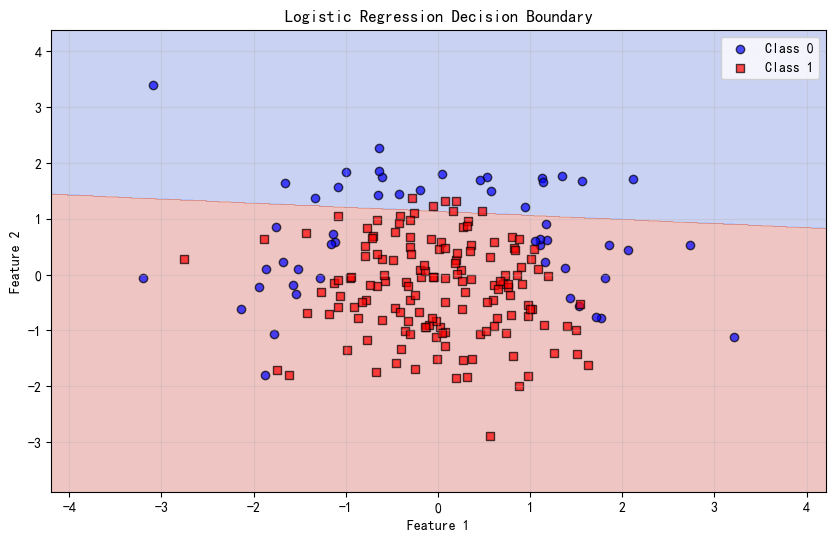

==========多项式+标准化逻辑回归决策边界==========


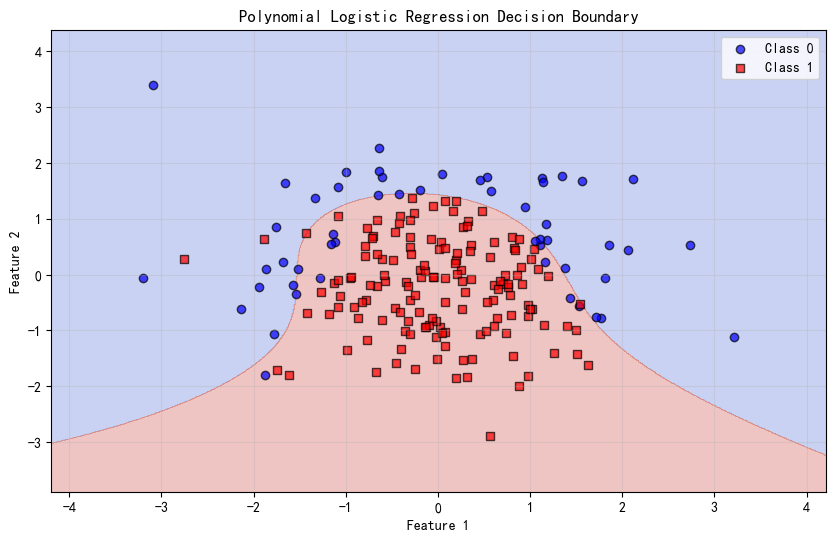

==========网格搜索最佳模型决策边界==========


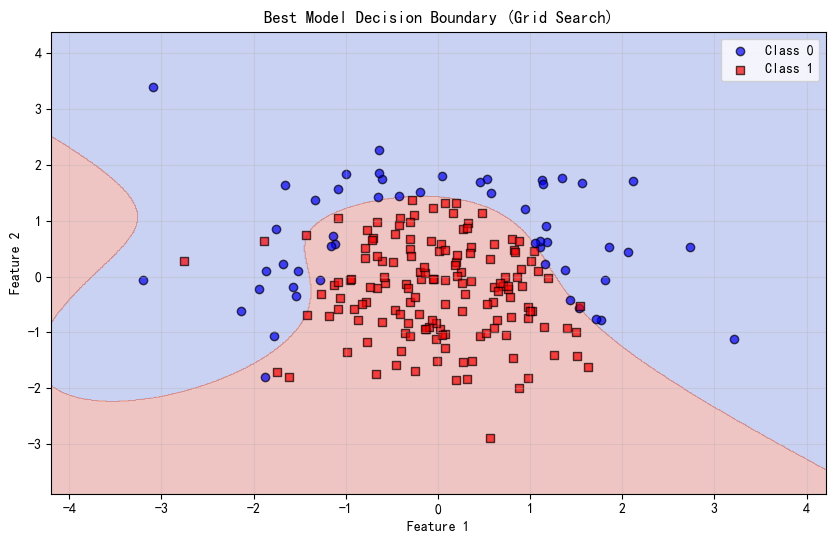

==========模型性能对比==========
原始逻辑回归: 训练集准确率=0.8125, 测试集准确率=0.8250
多项式逻辑回归: 训练集准确率=0.9375, 测试集准确率=0.8500
网格搜索最佳模型: 训练集准确率=0.9563, 测试集准确率=0.8750


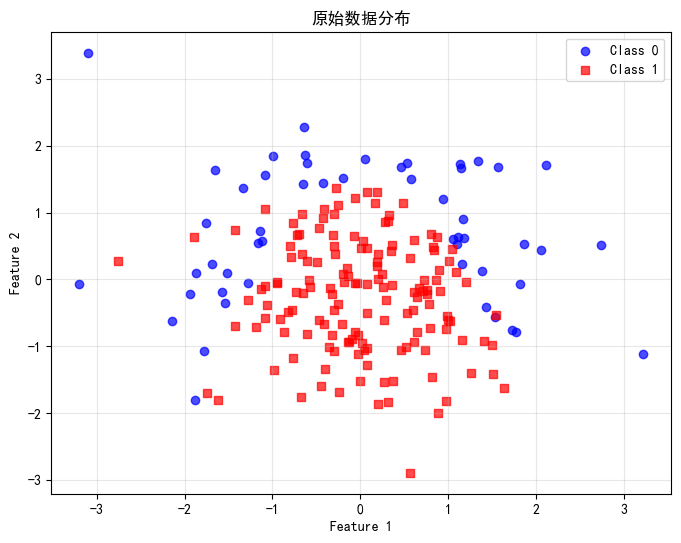

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams["axes.unicode_minus"] = False  # 正确显示负号

np.random.seed(666)

# 生成数据
X = np.random.normal(0, 1, size=(200, 2))
y = np.array(X[:, 0]**2 + X[:, 1] < 1.5, dtype='int')

# 制造一些异常点
for _ in range(20):
    y[np.random.randint(200)] = 1

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=999, test_size=0.2)

# 逻辑回归
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# 模型评估
print("==========直接训练==========")
print('训练集准确率:', log_reg.score(X_train, y_train))
print('测试集准确率:', log_reg.score(X_test, y_test))

# 创建管道
pipe = Pipeline([
    ('poly', PolynomialFeatures(degree=3)),
    ('std', StandardScaler()),
    ('log_reg', LogisticRegression())
])

pipe.fit(X_train, y_train)
print("==========多项式标准化训练==========")
print('训练集准确率:', pipe.score(X_train, y_train))
print('测试集准确率:', pipe.score(X_test, y_test))

# 网格搜索
param_grid = {
    'poly__degree': [2, 3, 4],
    'log_reg__C': [0.1, 1, 10]
}

grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("==========网格搜索==========")
print("最佳参数:", grid_search.best_params_)
print("最佳模型训练集准确率:", grid_search.best_estimator_.score(X_train,y_train))
print("最佳模型测试集准确率:", grid_search.best_estimator_.score(X_test,y_test))

###############################################################################
#                                                                             #
#                                                                             #
###############################################################################

# 修正后的绘制决策边界函数
def plot_decision_boundary(model, X, y, title):
    # 创建网格点
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # 预测网格点的类别
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界和数据点
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    
    # 修正后的散点图绘制 - 分别绘制两个类别的点
    plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', marker='o', label='Class 0', edgecolors='k', alpha=0.7)
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', marker='s', label='Class 1', edgecolors='k', alpha=0.7)
    
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# 绘制原始逻辑回归的决策边界
print("==========原始逻辑回归决策边界==========")
plot_decision_boundary(log_reg, X, y, 'Logistic Regression Decision Boundary')

# 绘制管道模型的决策边界
print("==========多项式+标准化逻辑回归决策边界==========")
plot_decision_boundary(pipe, X, y, 'Polynomial Logistic Regression Decision Boundary')

# 绘制网格搜索最佳模型的决策边界
print("==========网格搜索最佳模型决策边界==========")
plot_decision_boundary(grid_search.best_estimator_, X, y, 'Best Model Decision Boundary (Grid Search)')

# 更详细的性能分析
print("==========模型性能对比==========")
models = {
    '原始逻辑回归': log_reg,
    '多项式逻辑回归': pipe,
    '网格搜索最佳模型': grid_search.best_estimator_
}

for name, model in models.items():
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    print(f"{name}: 训练集准确率={train_acc:.4f}, 测试集准确率={test_acc:.4f}")

# 绘制数据分布
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='blue', marker='o', label='Class 0', alpha=0.7)
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='red', marker='s', label='Class 1', alpha=0.7)
plt.title('原始数据分布')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [9]:
import numpy as np
import pandas as pd
data = np.array([12, 2, 30, 24, 3, 26, 8, 16, 19, 25, 28, 1, 22, 13, 23, 21, 5, 15, 9, 27, 4, 7, 14, 6, 11, 29, 18, 17, 10, 20])
data =data.reshape(10, 3)
df = pd.DataFrame(data, index=[i for i in range(1, 11)])
df

,0,1,2
1,12,2,30
2,24,3,26
3,8,16,19
4,25,28,1
5,22,13,23
6,21,5,15
7,9,27,4
8,7,14,6
9,11,29,18
10,17,10,20
